# Know Your Data 1 - Gold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
# get data
df = pd.read_csv('gold.csv')
df = df[::-1].reset_index().drop(columns='index')
df

,Date,Price,Open,High,Low
0,"Dec 27, 1979",515.5,517.00,517.0,513.00
1,"Dec 28, 1979",517.8,516.00,517.8,510.40
2,"Dec 31, 1979",533.6,527.88,534.5,527.88
3,"Jan 02, 1980",575.5,562.50,577.0,558.00
4,"Jan 03, 1980",625.0,627.00,640.0,603.00
...,...,...,...,...,...
9766,"Jul 26, 2018",1225.3,1227.80,1227.8,1227.80
9767,"Jul 27, 2018",1222.2,1223.50,1226.8,1216.70
9768,"Jul 30, 2018",1221.3,1222.50,1223.9,1218.10
9769,"Jul 31, 2018",1223.7,1220.40,1228.1,1213.00


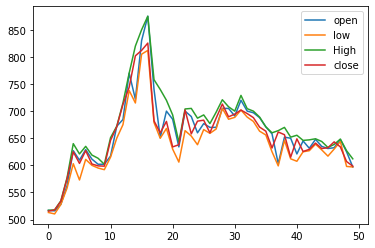

In [3]:
# plot data
plt.plot(df['Open'][:50], label='open')
plt.plot(df['Low'][:50], label='low')
plt.plot(df['High'][:50], label='High')
plt.plot(df['Price'][:50], label='close')
plt.legend(loc='best')
plt.show()

In [4]:
# get returns
df2 = df.iloc[:,1:].pct_change()[1:]
df2

,Price,Open,High,Low
1,0.004462,-0.001934,0.001547,-0.005068
2,0.030514,0.023023,0.032252,0.034248
3,0.078523,0.065583,0.079514,0.057058
4,0.086012,0.114667,0.109185,0.080645
5,-0.034240,-0.027911,-0.029687,-0.049751
...,...,...,...,...
9766,-0.006245,0.002040,-0.005266,0.003761
9767,-0.002530,-0.003502,-0.000814,-0.009041
9768,-0.000736,-0.000817,-0.002364,0.001151
9769,0.001965,-0.001718,0.003432,-0.004187


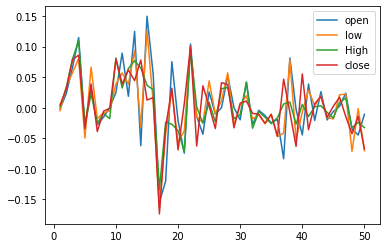

In [5]:
# plot returns
plt.plot(df2['Open'][:50], label='open')
plt.plot(df2['Low'][:50], label='low')
plt.plot(df2['High'][:50], label='High')
plt.plot(df2['Price'][:50], label='close')
plt.legend(loc='best')
plt.show()

In [6]:
# normalize returns
scaler = StandardScaler()
df3 = scaler.fit_transform(df2.values.reshape(-1, 4))
print('shape df3:', df3.shape)
print(df3[:5])

shape df3: (9770, 4)
[[ 0.35296001 -0.16815719  0.11975187 -0.43738897]
 [ 2.49166673  1.82999071  2.76141711  2.85170958]
 [ 6.43294578  5.23741794  6.82759269  4.76001969]
 [ 7.04773924  9.16714983  9.38042066  6.73324574]
 [-2.82420424 -2.24788495 -2.56755017 -4.17549344]]


In [7]:
# create dataframes for all
data = pd.DataFrame({
        'price': df['Price'][1:],
        'open': df2['Open'],
        'low': df2['Low'],
        'high': df2['High'],
        'close': df2['Price'],
        'open_std': df3[:,:1].squeeze(),
        'low_std': df3[:,1:2].squeeze(),
        'high_std': df3[:,2:3].squeeze(),
        'close_std': df3[:,3:4].squeeze()
    })
data

,price,open,low,high,close,open_std,low_std,high_std,close_std
1,517.8,-0.001934,-0.005068,0.001547,0.004462,0.352960,-0.168157,0.119752,-0.437389
2,533.6,0.023023,0.034248,0.032252,0.030514,2.491667,1.829991,2.761417,2.851710
3,575.5,0.065583,0.057058,0.079514,0.078523,6.432946,5.237418,6.827593,4.760020
4,625.0,0.114667,0.080645,0.109185,0.086012,7.047739,9.167150,9.380421,6.733246
5,603.6,-0.027911,-0.049751,-0.029687,-0.034240,-2.824204,-2.247885,-2.567550,-4.175493
...,...,...,...,...,...,...,...,...,...
9766,1225.3,0.002040,0.003761,-0.005266,-0.006245,-0.525986,0.150054,-0.466452,0.301218
9767,1222.2,-0.003502,-0.009041,-0.000814,-0.002530,-0.221013,-0.293692,-0.083451,-0.769708
9768,1221.3,-0.000817,0.001151,-0.002364,-0.000736,-0.073768,-0.078735,-0.216755,0.082872
9769,1223.7,-0.001718,-0.004187,0.003432,0.001965,0.148007,-0.150828,0.281865,-0.363654


In [8]:
tot = len(data)
ticks = [i for i in range(0, tot, tot // 5)]
dates = [df['Date'][i] for i in range(0, tot, tot // 5)]
ticks2 = [i for i in range(len(data) - 365, len(data), (len(data) - (len(data) - 365)) // 5)]
dates2 = [df['Date'][i] for i in range(len(data) - 365, len(data), (len(data) - (len(data) - 365)) // 5)]
names = data.columns.tolist()
names

['price',
 'open',
 'low',
 'high',
 'close',
 'open_std',
 'low_std',
 'high_std',
 'close_std']

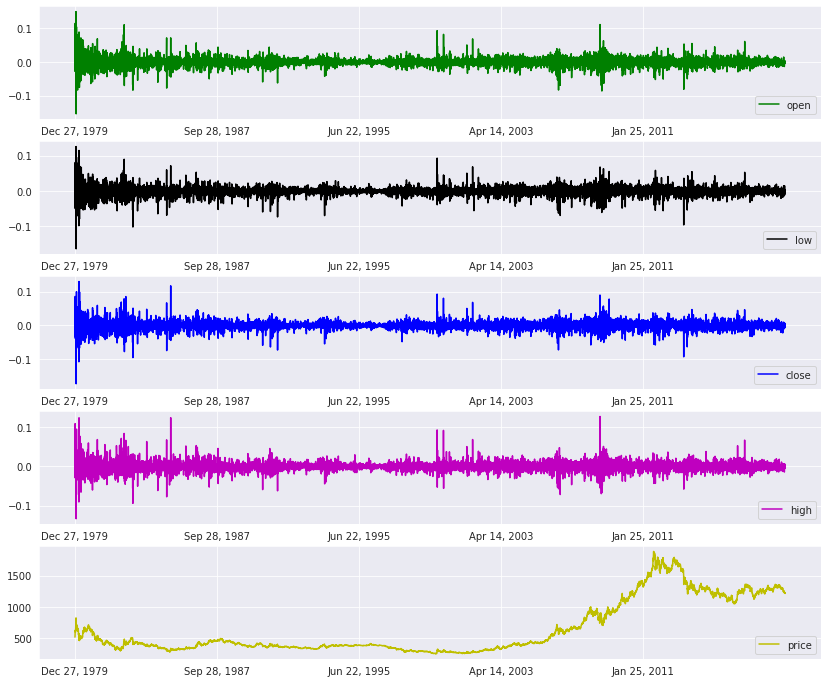

In [9]:
# plot returns
sns.set_style('darkgrid')
fig = plt.figure(figsize=(14, 12))
plt.subplot(5, 1, 1)
plt.plot(data['open'], 'g', label='open')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(5, 1, 2)
plt.plot(data['low'], 'k', label='low')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(5, 1, 3)
plt.plot(data['close'], 'b', label='close')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(5, 1, 4)
plt.plot(data['high'], 'm', label='high')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(5, 1, 5)
plt.plot(data['price'], 'y', label='price')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.show()

In [10]:
data[['price']].describe()

,price
count,9770.000000
mean,638.934854
std,419.796453
min,253.000000
25%,351.125000
50%,407.850000
75%,926.825000
max,1888.700000


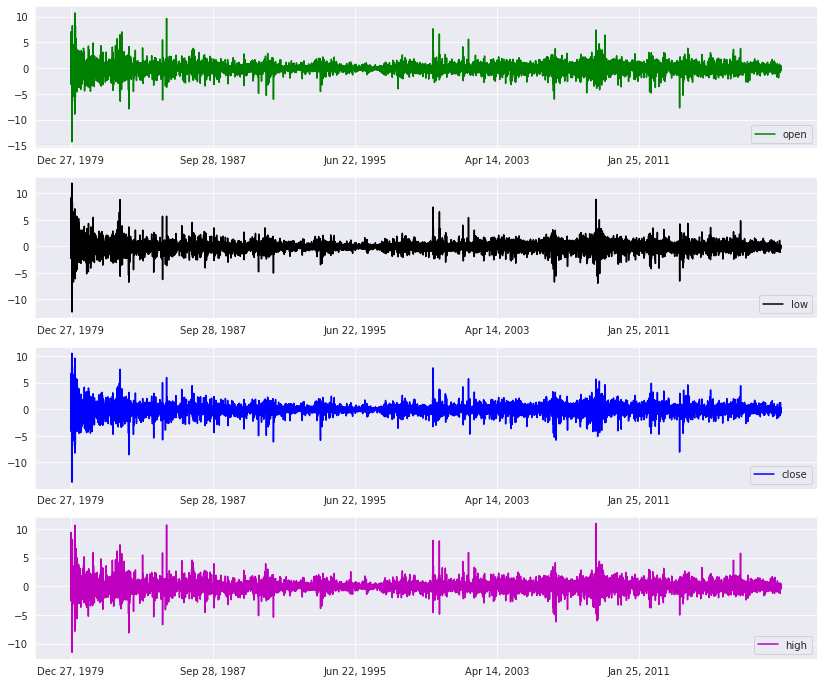

In [10]:
# plot normalized returns
fig = plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(data['open_std'], 'g', label='open')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(4, 1, 2)
plt.plot(data['low_std'], 'k', label='low')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(4, 1, 3)
plt.plot(data['close_std'], 'b', label='close')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(4, 1, 4)
plt.plot(data['high_std'], 'm', label='high')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.show()

In [11]:
# outliers, the approach is to simply remove them from the dataset.
out_data = {}
sorted_ind = []
for name in names:
    std = np.std(data[name].values)
    mu = np.mean(data[name].values)
    out_data[name] = [[], [], [], (std, mu)]
    for ind, val in enumerate(data[name].values):
        if val > mu + (3 * std) or val < mu - (3 * std):
            out_data[name][0].append(ind)
            out_data[name][1].append(val)
            sorted_ind.append(ind)
        else:
            out_data[name][2].append(val)
data = data.drop(data.index[list(set(sorted_ind))])
data = data.reset_index()
data

,index,price,open,low,high,close,open_std,low_std,high_std,close_std
0,1,517.8,-0.001934,-0.005068,0.001547,0.004462,0.352960,-0.168157,0.119752,-0.437389
1,2,533.6,0.023023,0.034248,0.032252,0.030514,2.491667,1.829991,2.761417,2.851710
2,8,599.0,-0.015536,-0.008333,-0.009693,-0.005809,-0.490209,-1.257108,-0.847323,-0.710542
3,9,598.5,0.000000,-0.005042,-0.017945,-0.000835,-0.081842,-0.013298,-1.557241,-0.435196
4,26,660.0,-0.010340,-0.010511,-0.023088,-0.034099,-2.812647,-0.841119,-1.999762,-0.892681
...,...,...,...,...,...,...,...,...,...,...
9452,9766,1225.3,0.002040,0.003761,-0.005266,-0.006245,-0.525986,0.150054,-0.466452,0.301218
9453,9767,1222.2,-0.003502,-0.009041,-0.000814,-0.002530,-0.221013,-0.293692,-0.083451,-0.769708
9454,9768,1221.3,-0.000817,0.001151,-0.002364,-0.000736,-0.073768,-0.078735,-0.216755,0.082872
9455,9769,1223.7,-0.001718,-0.004187,0.003432,0.001965,0.148007,-0.150828,0.281865,-0.363654


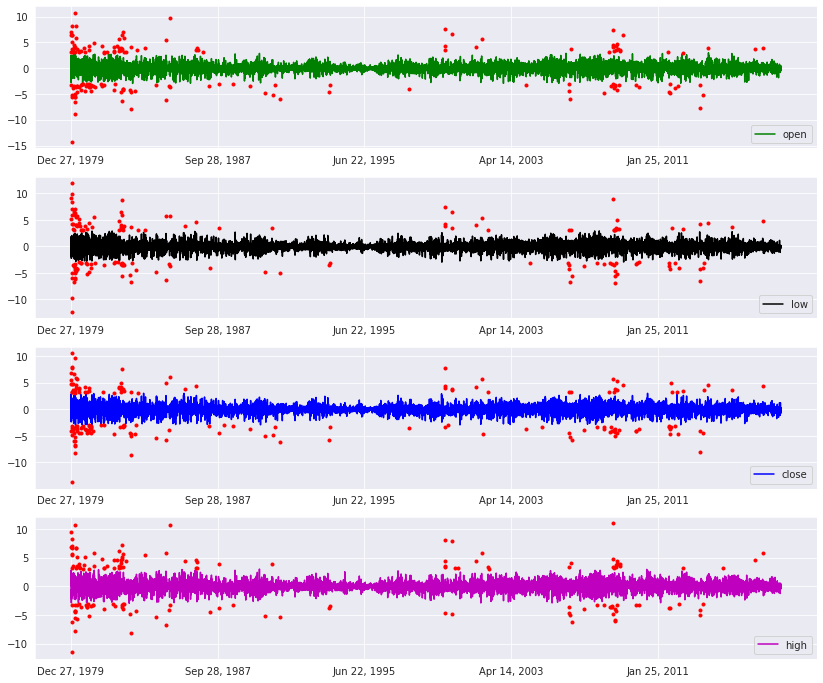

In [12]:
# plot normalized with outliers
fig = plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(data['open_std'], 'g', label='open')
plt.plot(out_data['open_std'][0], out_data['open_std'][1], '.', color='r')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(4, 1, 2)
plt.plot(data['low_std'], 'k', label='low')
plt.plot(out_data['low_std'][0], out_data['low_std'][1], '.', color='r')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(4, 1, 3)
plt.plot(data['close_std'], 'b', label='close')
plt.plot(out_data['close_std'][0], out_data['close_std'][1], '.', color='r')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.subplot(4, 1, 4)
plt.plot(data['high_std'], 'm', label='high')
plt.plot(out_data['high_std'][0], out_data['high_std'][1], '.', color='r')
plt.legend(loc=('lower right'))
plt.xticks(ticks, dates)
plt.show()

In [33]:
## *update* need the mean diff to set level of added noise in data augmentation
diff_close = data['close_std'].diff()
mean_diff = np.mean([abs(i) for i in diff_close][1:])
print(mean_diff)

0.825600757948727


In [15]:
## **update** need mean magnitude
mean_mag = np.mean([abs(i) for i in data['close_std']])
med_mag = np.median([abs(i) for i in data['close_std']])
print(mean_mag)
print(med_mag)

0.6444054687416702
0.4185775515368043


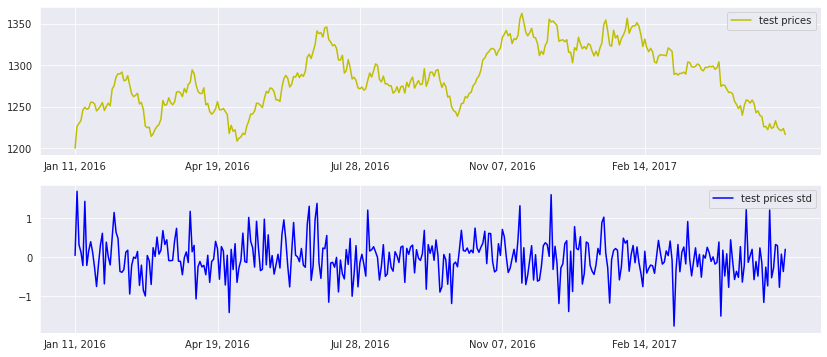

In [30]:
# plot test prices and returns
fig = plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(data['price'][len(data) - 365:], 'y', label='test prices')
plt.legend(loc=('best'))
plt.xticks(ticks2, dates2)
plt.subplot(2, 1, 2)
plt.plot(data['close_std'][len(data) - 365:], 'b', label='test prices std')
plt.legend(loc=('best'))
plt.xticks(ticks2, dates2)
plt.show()